In [1]:
import os
import numpy as np
import pandas as pd
from preprocess_utils import (
    remove_invalids, apply_smoothing, baseline_correction
)

In [11]:
base_dir = r"eye-data-sept2025\EXPERIMENTS_selective"
subjects = os.listdir(base_dir)
subjects = [os.path.join(base_dir, s) for s in subjects]

subject_summaries = []

for s in subjects:
    subj_id = os.path.splitext(os.path.basename(s))[0]
    
    df = pd.read_csv(os.path.join(s, "eye_tracking_data.csv"))

    # clean, smooth, baseline correction
    df = remove_invalids(df)
    df = apply_smoothing(df)
    df = baseline_correction(df)

    # keep only rows where stimulus was actually presented
    stim_df = df[df["stim_present"] == True].copy()
    if stim_df.empty:
        continue

    # ensure columns exist
    for col in ["left_pupil_diameter_smooth", "right_pupil_diameter_smooth",
                "left_pupil_diameter_bc", "right_pupil_diameter_bc"]:
        if col not in stim_df.columns:
            stim_df[col] = np.nan

    # drop rows that are NaN for the metric when computing per-category stats
    # group by stim_cat and compute mean/std separately for smooth (uncorrected) and bc (baseline-corrected)
    agg_uncorr = (
        stim_df.groupby("stim_cat")[["left_pupil_diameter_smooth", "right_pupil_diameter_smooth"]]
        .agg(["mean", "std"])
        .reset_index()
    )
    agg_bc = (
        stim_df.groupby("stim_cat")[["left_pupil_diameter_bc", "right_pupil_diameter_bc"]]
        .agg(["mean", "std"])
        .reset_index()
    )

    # merge the two aggregations on stim_cat
    agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))

    # flatten multiindex columns if needed
    agg.columns = [
        "stim_cat",
        "left_mean_uncorr", "left_std_uncorr",
        "right_mean_uncorr", "right_std_uncorr",
        "left_mean_bc", "left_std_bc",
        "right_mean_bc", "right_std_bc",
    ]

    agg["subject_id"] = subj_id
    # reorder columns
    cols = ["subject_id", "stim_cat",
            "left_mean_uncorr", "left_std_uncorr", "right_mean_uncorr", "right_std_uncorr",
            "left_mean_bc", "left_std_bc", "right_mean_bc", "right_std_bc"]
    agg = agg[cols]

    subject_summaries.append(agg)

# combine subject summaries (this is a summary table, not raw sample aggregation)
if not subject_summaries:
    raise RuntimeError("No subject summaries were produced. Check input files and preprocessing functions.")

all_subjects_df = pd.concat(subject_summaries, ignore_index=True)

# Group-level summary across subjects.
# For each stim_cat compute mean and std of subject-level means and subject-level stds.
group_summary = (
    all_subjects_df.groupby("stim_cat")
    .agg({
        "left_mean_uncorr": ["mean", "std"],
        "left_std_uncorr": ["mean", "std"],
        "right_mean_uncorr": ["mean", "std"],
        "right_std_uncorr": ["mean", "std"],
        "left_mean_bc": ["mean", "std"],
        "left_std_bc": ["mean", "std"],
        "right_mean_bc": ["mean", "std"],
        "right_std_bc": ["mean", "std"],
    })
    .reset_index()
)

# flatten multiindex columns
group_summary.columns = [
    "stim_cat",
    "left_mean_uncorr_mean", "left_mean_uncorr_std",
    "left_std_uncorr_mean",  "left_std_uncorr_std",
    "right_mean_uncorr_mean","right_mean_uncorr_std",
    "right_std_uncorr_mean", "right_std_uncorr_std",
    "left_mean_bc_mean",    "left_mean_bc_std",
    "left_std_bc_mean",     "left_std_bc_std",
    "right_mean_bc_mean",   "right_mean_bc_std",
    "right_std_bc_mean",    "right_std_bc_std",
]

# save outputs
all_subjects_df.to_csv("subject_level_pupil_summary.csv", index=False)
group_summary.to_csv("group_level_pupil_summary.csv", index=False)

print("Completed. Subject-level and group-level summary CSVs saved.")


input dataframe size: 474394
ouput dataframe size: 460956
number of segments removed: 29
total number of rows removed: 13438


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


input dataframe size: 634244
ouput dataframe size: 536051
number of segments removed: 219
total number of rows removed: 98193


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


input dataframe size: 566560
ouput dataframe size: 437373
number of segments removed: 255
total number of rows removed: 129187


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


input dataframe size: 676658
ouput dataframe size: 360201
number of segments removed: 215
total number of rows removed: 316457


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))
C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:10: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(s, "eye_tracking_data.csv"))


input dataframe size: 595639
ouput dataframe size: 456059
number of segments removed: 292
total number of rows removed: 139580


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


input dataframe size: 519294
ouput dataframe size: 504764
number of segments removed: 25
total number of rows removed: 14530


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


input dataframe size: 487785
ouput dataframe size: 420617
number of segments removed: 153
total number of rows removed: 67168


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


input dataframe size: 501937
ouput dataframe size: 376463
number of segments removed: 243
total number of rows removed: 125474


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


input dataframe size: 578048
ouput dataframe size: 547655
number of segments removed: 71
total number of rows removed: 30393


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


input dataframe size: 803989
ouput dataframe size: 654785
number of segments removed: 161
total number of rows removed: 149204
Completed. Subject-level and group-level summary CSVs saved.


C:\Users\Deepshik\AppData\Local\Temp\ipykernel_9928\1400612425.py:42: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg = pd.merge(agg_uncorr, agg_bc, on="stim_cat", how="outer", suffixes=("_uncorr", "_bc"))


In [16]:
grp = pd.read_csv("group_level_pupil_summary.csv")
grp

,stim_cat,left_mean_uncorr_mean,left_mean_uncorr_std,left_std_uncorr_mean,left_std_uncorr_std,right_mean_uncorr_mean,right_mean_uncorr_std,right_std_uncorr_mean,right_std_uncorr_std,left_mean_bc_mean,left_mean_bc_std,left_std_bc_mean,left_std_bc_std,right_mean_bc_mean,right_mean_bc_std,right_std_bc_mean,right_std_bc_std
0,negative,3.299001,0.550124,0.170843,0.053508,3.353719,0.479948,0.175744,0.053828,-0.067150,0.109664,0.18626,0.065556,-0.089935,0.119799,0.190045,0.064988
1,neutral,3.265013,0.544542,0.186261,0.067403,3.327489,0.486702,0.187620,0.081330,-0.130445,0.109109,0.19033,0.055716,-0.144686,0.110864,0.188296,0.071026
2,positive,3.254057,0.529396,0.201331,0.074769,3.314125,0.477696,0.207215,0.080174,-0.110603,0.097100,0.20185,0.078911,-0.123954,0.108542,0.207038,0.088855


In [17]:
grp.columns

Index(['stim_cat', 'left_mean_uncorr_mean', 'left_mean_uncorr_std',
       'left_std_uncorr_mean', 'left_std_uncorr_std', 'right_mean_uncorr_mean',
       'right_mean_uncorr_std', 'right_std_uncorr_mean',
       'right_std_uncorr_std', 'left_mean_bc_mean', 'left_mean_bc_std',
       'left_std_bc_mean', 'left_std_bc_std', 'right_mean_bc_mean',
       'right_mean_bc_std', 'right_std_bc_mean', 'right_std_bc_std'],
      dtype='object')

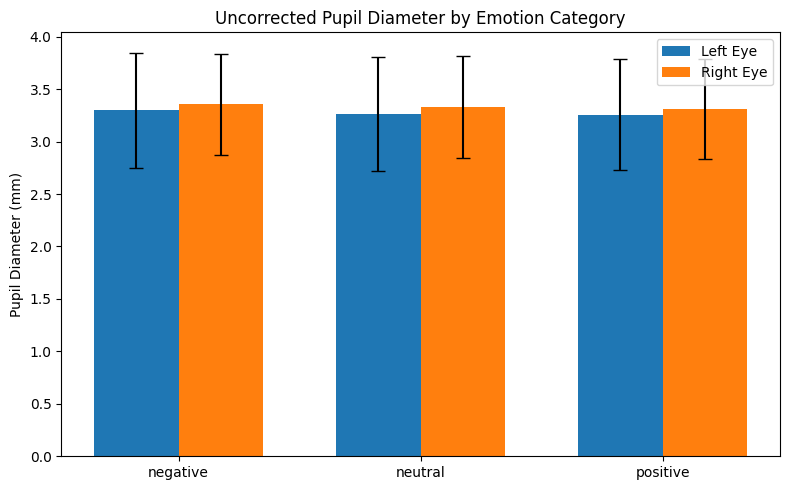

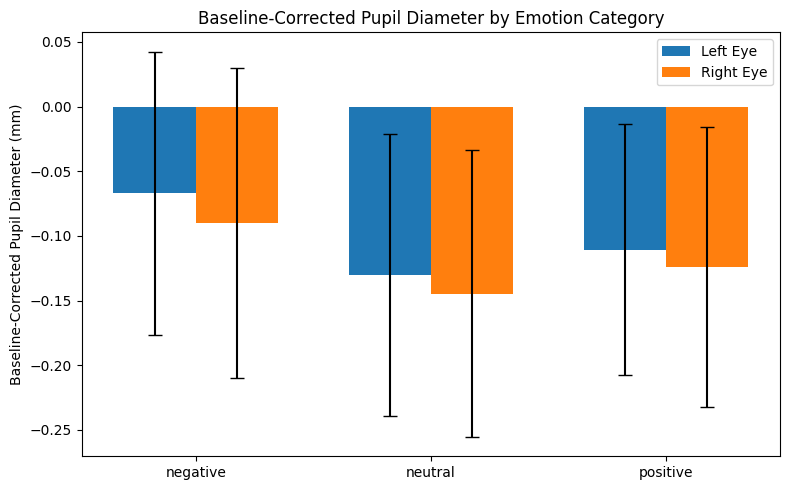

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `group_summary` is your DataFrame at group level
group_summary = grp

# --- PARAMETERS ---
categories = group_summary['stim_cat'].tolist()
x = np.arange(len(categories))  # x positions
width = 0.35  # width of bars

# --- UNCORRECTED ---
fig, ax = plt.subplots(figsize=(8,5))

left_means = group_summary['left_mean_uncorr_mean']
right_means = group_summary['right_mean_uncorr_mean']
left_std = group_summary['left_mean_uncorr_std']
right_std = group_summary['right_mean_uncorr_std']

ax.bar(x - width/2, left_means, width, yerr=left_std, capsize=5, label='Left Eye')
ax.bar(x + width/2, right_means, width, yerr=right_std, capsize=5, label='Right Eye')

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Pupil Diameter (mm)')
ax.set_title('Uncorrected Pupil Diameter by Emotion Category')
ax.legend()
plt.tight_layout()
plt.show()

# --- BASELINE-CORRECTED ---
fig, ax = plt.subplots(figsize=(8,5))

left_means_bc = group_summary['left_mean_bc_mean']
right_means_bc = group_summary['right_mean_bc_mean']
left_std_bc = group_summary['left_mean_bc_std']
right_std_bc = group_summary['right_mean_bc_std']

ax.bar(x - width/2, left_means_bc, width, yerr=left_std_bc, capsize=5, label='Left Eye')
ax.bar(x + width/2, right_means_bc, width, yerr=right_std_bc, capsize=5, label='Right Eye')

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Baseline-Corrected Pupil Diameter (mm)')
ax.set_title('Baseline-Corrected Pupil Diameter by Emotion Category')
ax.legend()
plt.tight_layout()
plt.show()


In [20]:
subject_lvl = pd.read_csv("subject_level_pupil_summary.csv")
subject_lvl

,subject_id,stim_cat,left_mean_uncorr,left_std_uncorr,right_mean_uncorr,right_std_uncorr,left_mean_bc,left_std_bc,right_mean_bc,right_std_bc
0,anjana,negative,3.368842,0.174264,3.375297,0.190388,-0.188895,0.195229,-0.188734,0.196776
1,anjana,neutral,3.374706,0.220112,3.371419,0.207219,-0.150316,0.233096,-0.161492,0.227229
2,anjana,positive,3.338062,0.186769,3.337735,0.199160,-0.128647,0.266543,-0.152838,0.256472
3,ankita,negative,3.075987,0.153618,3.082620,0.169131,-0.248389,0.165174,-0.282977,0.186601
4,ankita,neutral,3.016096,0.149836,3.028792,0.159058,-0.221163,0.189251,-0.225343,0.207251
5,ankita,positive,3.106573,0.173195,3.119560,0.174249,-0.180624,0.186987,-0.186729,0.193221
6,deepali,negative,3.180533,0.210693,3.658055,0.240040,-0.201910,0.249318,-0.253601,0.284228
7,deepali,neutral,3.159096,0.245693,3.628342,0.312524,-0.320284,0.251768,-0.352020,0.301789
8,deepali,positive,3.128058,0.229393,3.565432,0.305763,-0.300105,0.212454,-0.360761,0.284305
9,jini,negative,3.134649,0.165386,3.157966,0.156183,0.083282,0.181560,0.057084,0.196861


In [21]:
import pandas as pd
from scipy import stats

# Suppose your dataframe is called `df`
df = subject_lvl

# Example for left pupil, baseline-corrected
left_bc = df.pivot(index='subject_id', columns='stim_cat', values='left_mean_bc')

# Example for right pupil, baseline-corrected
right_bc = df.pivot(index='subject_id', columns='stim_cat', values='right_mean_bc')

# LEFT PUPIL, baseline-corrected
t_pos_neg, p_pos_neg = stats.ttest_rel(left_bc['positive'], left_bc['negative'])
t_pos_neu, p_pos_neu = stats.ttest_rel(left_bc['positive'], left_bc['neutral'])
t_neg_neu, p_neg_neu = stats.ttest_rel(left_bc['negative'], left_bc['neutral'])

print("Left pupil (baseline-corrected):")
print(f"Positive vs Negative: t={t_pos_neg:.3f}, p={p_pos_neg:.3f}")
print(f"Positive vs Neutral: t={t_pos_neu:.3f}, p={p_pos_neu:.3f}")
print(f"Negative vs Neutral: t={t_neg_neu:.3f}, p={p_neg_neu:.3f}")

# RIGHT PUPIL, baseline-corrected
t_pos_neg_r, p_pos_neg_r = stats.ttest_rel(right_bc['positive'], right_bc['negative'])
t_pos_neu_r, p_pos_neu_r = stats.ttest_rel(right_bc['positive'], right_bc['neutral'])
t_neg_neu_r, p_neg_neu_r = stats.ttest_rel(right_bc['negative'], right_bc['neutral'])

print("\nRight pupil (baseline-corrected):")
print(f"Positive vs Negative: t={t_pos_neg_r:.3f}, p={p_pos_neg_r:.3f}")
print(f"Positive vs Neutral: t={t_pos_neu_r:.3f}, p={p_pos_neu_r:.3f}")
print(f"Negative vs Neutral: t={t_neg_neu_r:.3f}, p={p_neg_neu_r:.3f}")



Left pupil (baseline-corrected):
Positive vs Negative: t=-1.836, p=0.100
Positive vs Neutral: t=0.861, p=0.411
Negative vs Neutral: t=2.823, p=0.020

Right pupil (baseline-corrected):
Positive vs Negative: t=-1.464, p=0.177
Positive vs Neutral: t=1.210, p=0.257
Negative vs Neutral: t=2.801, p=0.021


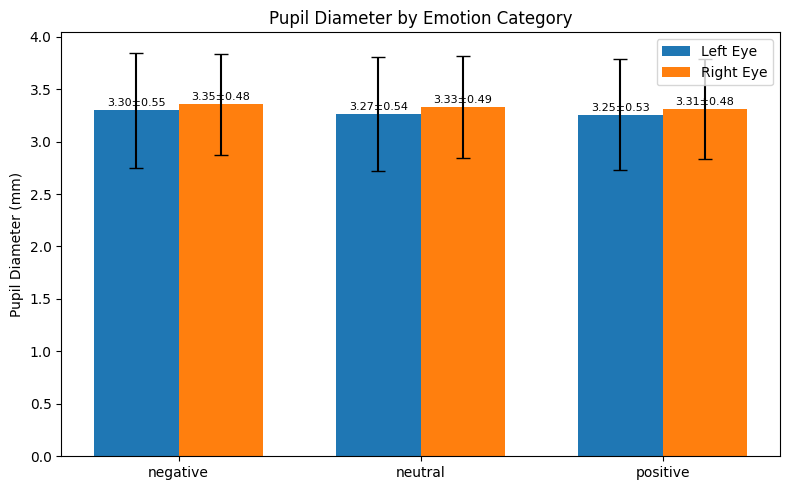

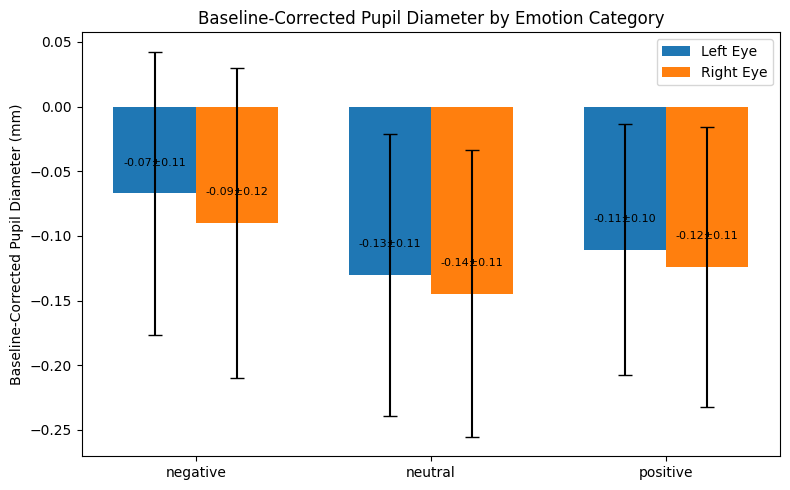

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `group_summary` is your DataFrame at group level
group_summary = grp
categories = group_summary['stim_cat'].tolist()
x = np.arange(len(categories))  # x positions
width = 0.35  # width of bars

# --- UNCORRECTED ---
fig, ax = plt.subplots(figsize=(8,5))

left_means = group_summary['left_mean_uncorr_mean']
right_means = group_summary['right_mean_uncorr_mean']
left_std = group_summary['left_mean_uncorr_std']
right_std = group_summary['right_mean_uncorr_std']

bars_left = ax.bar(x - width/2, left_means, width, yerr=left_std, capsize=5, label='Left Eye')
bars_right = ax.bar(x + width/2, right_means, width, yerr=right_std, capsize=5, label='Right Eye')

# Annotate bars
for bar, mean, std in zip(bars_left, left_means, left_std):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{mean:.2f}±{std:.2f}",
            ha='center', va='bottom', fontsize=8)
for bar, mean, std in zip(bars_right, right_means, right_std):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{mean:.2f}±{std:.2f}",
            ha='center', va='bottom', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Pupil Diameter (mm)')
ax.set_title('Pupil Diameter by Emotion Category')
ax.legend()
plt.tight_layout()
plt.show()

# --- BASELINE-CORRECTED ---
fig, ax = plt.subplots(figsize=(8,5))

left_means_bc = group_summary['left_mean_bc_mean']
right_means_bc = group_summary['right_mean_bc_mean']
left_std_bc = group_summary['left_mean_bc_std']
right_std_bc = group_summary['right_mean_bc_std']

bars_left_bc = ax.bar(x - width/2, left_means_bc, width, yerr=left_std_bc, capsize=5, label='Left Eye')
bars_right_bc = ax.bar(x + width/2, right_means_bc, width, yerr=right_std_bc, capsize=5, label='Right Eye')

# Annotate bars
for bar, mean, std in zip(bars_left_bc, left_means_bc, left_std_bc):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{mean:.2f}±{std:.2f}",
            ha='center', va='bottom', fontsize=8)
for bar, mean, std in zip(bars_right_bc, right_means_bc, right_std_bc):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{mean:.2f}±{std:.2f}",
            ha='center', va='bottom', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Baseline-Corrected Pupil Diameter (mm)')
ax.set_title('Baseline-Corrected Pupil Diameter by Emotion Category')
ax.legend()
plt.tight_layout()
plt.show()


In [26]:
from preprocess_utils import pygaze_compatible_format_fixsacc
help(pygaze_compatible_format_fixsacc)

Help on function pygaze_compatible_format_fixsacc in module preprocess_utils:

pygaze_compatible_format_fixsacc(df)
    Convert data captured by Tobii into a format compatible with PyGaze to calculate fixations and saccades.
    Args:
        - df (pd.DataFrame): The dataframe containing eye-tracking data.
    Returns:
        - data (np.array): PyGaze compatible np array ([[t, x, y], [t, x, y], ...]).



Help on function overview_plot in module utils.analysis_utils:

overview_plot(dataframe, pupil_to_plot=None)
    Plot the pupil diameter across the entire experiment session, with scrambled, stimulus, and fixation segments highlighted.
    
    Args:
        - df (pd.DataFrame):    The dataframe containing eye-tracking data.
        - pupil_to_plot (str):  Which pupil diameter to plot. Allowed values: "left" or "right".
    
    Returns:
        - 1 (int): Will happen if you forget to pass in the `pupil_to_plot` argument.

